In [3]:
logFrequency = 5
gridSize = 31 * 4 - 1

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal 
import math

In [3]:
f = open("C:\\Users\\stuart\\AppData\\Local\\Unity\\Editor\\Editor.log", "r")
lines = f.readlines()
f.close()

allLogs = list(filter(lambda s: "METRICS: " in s, lines))

newIndices = [i for i,m in enumerate(allLogs) if m == "METRICS: NEW\n"]

logs = list(map(lambda s: s.replace("METRICS: ", "").rstrip(), allLogs[newIndices[-1] + 1:]))
  
splitLogs = [map(float, s.split()) for s in logs]

metrics = list(map(list, zip(*splitLogs)))
profitInPounds = list(map(lambda x: x/100, metrics[0]))
metrics[0] = profitInPounds

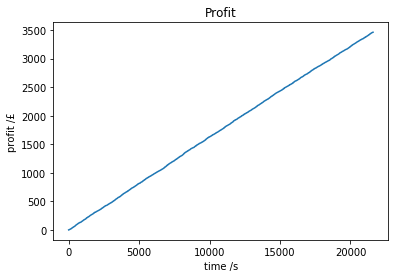

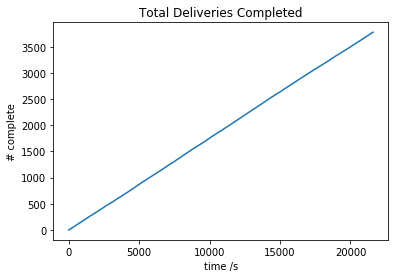

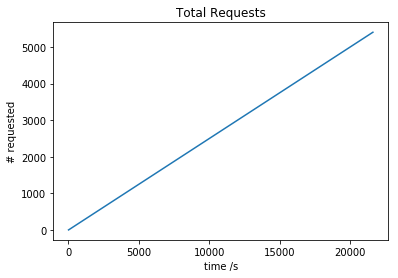

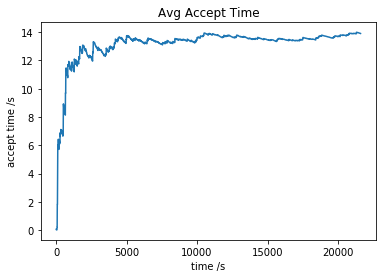

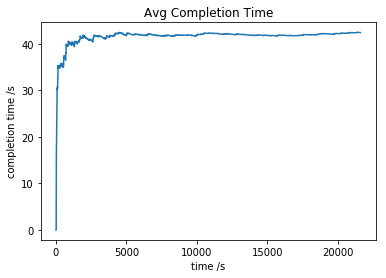

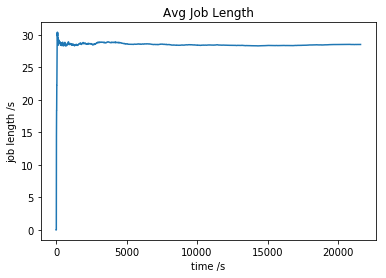

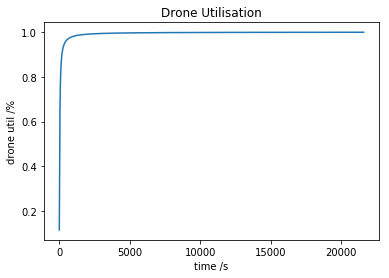

In [4]:
titles = ["Total Profit", "Total Deliveries Completed", "Total Requests", "Avg Accept Time", "Avg Completion Time", "Avg Job Length", "Drone Utilisation"]
times = list(map(lambda x: x * logFrequency, range(1, len(metrics[1]) + 1)))
labels = ["profit /£", "# complete", "# requested", "accept time /s", "completion time /s", "job length /s", "drone util /%"]

for i in range(0, 7):
    plt.figure(i + 1)
    plt.yscale("linear")
    plt.xlabel("time /s")
    plt.ylabel(labels[i])
    plt.title(titles[i])
    plt.plot(times, metrics[i])
    
plt.show()

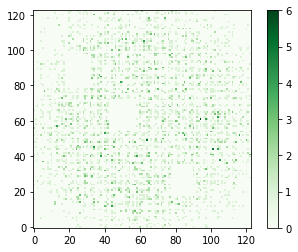

In [5]:
allAccepted = list(filter(lambda s: "ACCEPTED: " in s or s == "METRICS: NEW\n", lines))

newIndices = [i for i,m in enumerate(allAccepted) if m == "METRICS: NEW\n"]

accepted = list(map(lambda s: s.replace("ACCEPTED: ", "").rstrip(), allAccepted[newIndices[-1] + 1:]))

acceptedMap = np.zeros((gridSize, gridSize), dtype=int)

for a in accepted:
    pos = eval(a)
    acceptedMap[pos] += 1

fig, ax = plt.subplots()
im = ax.imshow(acceptedMap, cmap="Greens")
plt.gca().invert_yaxis()
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()


In [6]:
# SAVE THE LATEST LOGS TO FILE
fileName = "HVDxSJF30to1.txt"

path = "C:\\Users\\Stuart\\Desktop\\drone project\\logs\\"
fullPath = path + fileName
f = open("C:\\Users\\stuart\\AppData\\Local\\Unity\\Editor\\Editor.log", "r")
lines = f.readlines()
f.close()

allLogs = list(filter(lambda s: "METRICS: " in s or "ACCEPTED: " in s, lines))

newIndices = [i for i,m in enumerate(allLogs) if m == "METRICS: NEW\n"]

newLogs = allLogs[newIndices[-1] + 1:]

f = open(fullPath, "w+")
for l in newLogs:
    f.write(l)
f.close()


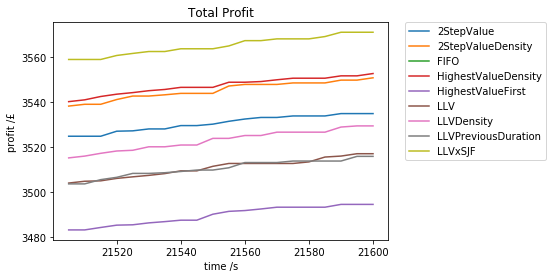

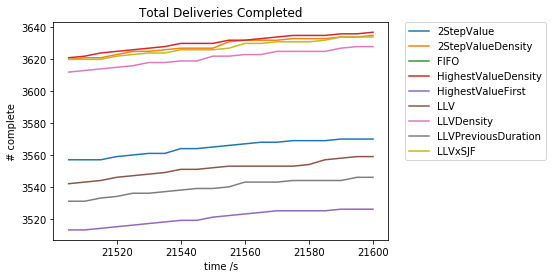

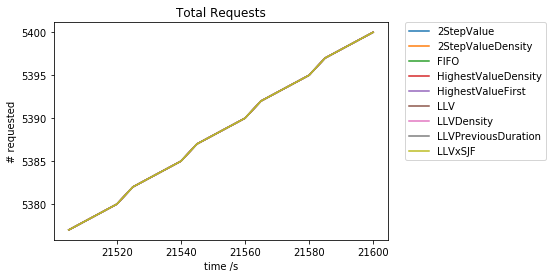

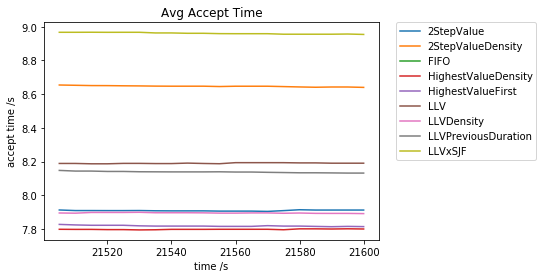

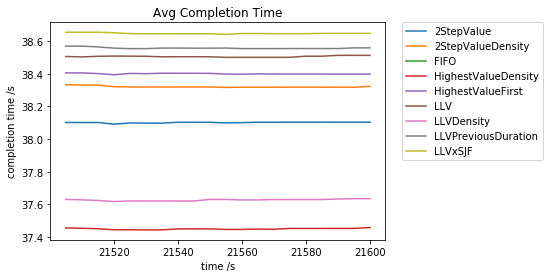

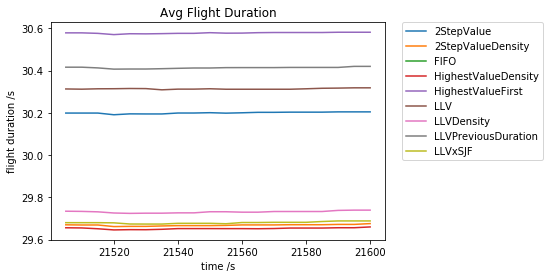

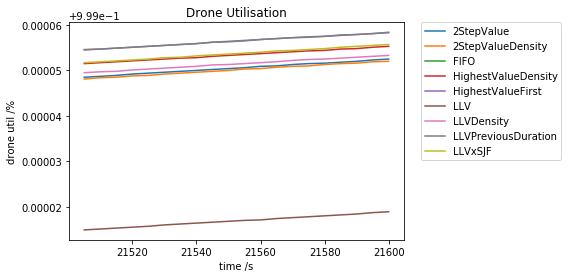

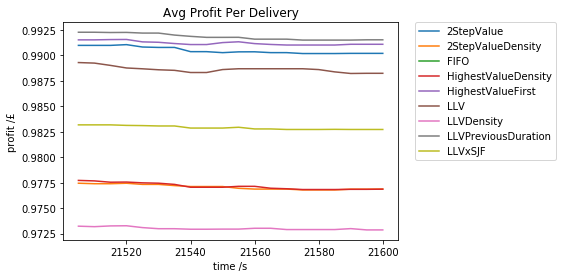

In [63]:
logsToCompare = ["2StepValue", "2StepValueDensity", "FIFO", "HighestValueDensity", "HighestInitialValueDensity", "HVDxSJF", "HighestValueFirst", "HighestInitialValueFirst", "LIFO", "LLV", "LLVDensity", "LLVDispatch", "LLVxSJF", "SJF", "SJFxLIFO", "LLVPreviousDuration"]
logsToCompare.sort()

startIndex = 4300

path = "C:\\Users\\Stuart\\Desktop\\drone project\\logs\\"

labels = ["profit /£", "# complete", "# requested", "accept time /s", "completion time /s", "flight duration /s", "drone util /%", "profit /£"]
titles = ["Total Profit", "Total Deliveries Completed", "Total Requests", "Avg Accept Time", "Avg Completion Time", "Avg Flight Duration", "Drone Utilisation", "Avg Profit Per Delivery"]

lineNum = 0

for logName in logsToCompare:
    fullPath = path + logName + ".txt"
    f = open(fullPath, "r")
    lines = f.readlines()
    f.close()
    
    metrics = list(filter(lambda s: "METRICS: " in s, lines))
    strippedMetrics = list(map(lambda s: s.replace("METRICS: ", "").rstrip(), metrics))
    splitMetrics = [map(float, s.split()) for s in strippedMetrics]

    finalMetrics = list(map(list, zip(*splitMetrics)))
    profitInPounds = list(map(lambda x: x/100, finalMetrics[0]))
    finalMetrics[0] = profitInPounds
    
    profitPerDelivery = []
    for i in range(0, len(finalMetrics[0])):
        currentProfit = finalMetrics[0][i]
        currentComplete = finalMetrics[1][i]
        if currentComplete == 0:
            profitPerDelivery.append(0.0)
        else:
            profitPerDelivery.append(currentProfit / currentComplete)
    
    finalMetrics.append(profitPerDelivery)
    
    times = list(map(lambda x: x * logFrequency, range(1, len(finalMetrics[1]) + 1)))
    
    lineStyle = '-' if lineNum < 10 else '--' 
    
    for i in range(0, 8):
        plt.figure(i + 1)
        plt.yscale("linear")
        plt.xlabel("time /s")
        plt.ylabel(labels[i])
        plt.title(titles[i])
        plt.plot(times[startIndex:], finalMetrics[i][startIndex:], lineStyle, label=logName)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    lineNum += 1

plt.show()

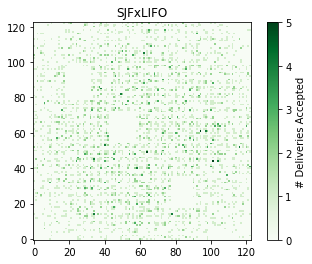

In [83]:
logName = "SJFxLIFO"

path = "C:\\Users\\Stuart\\Desktop\\drone project\\logs\\"
fullPath = path + logName + ".txt"
f = open(fullPath, "r")
lines = f.readlines()
f.close()

allAccepted = list(filter(lambda s: "ACCEPTED: " in s, lines))

accepted = list(map(lambda s: s.replace("ACCEPTED: ", "").rstrip(), allAccepted))

acceptedMap = np.zeros((gridSize, gridSize), dtype=int)

for a in accepted:
    pos = eval(a)
    acceptedMap[pos] += 1

fig, ax = plt.subplots()
im = ax.imshow(acceptedMap, cmap="Greens")
plt.gca().invert_yaxis()
cbar = ax.figure.colorbar(im, ax=ax, label="# Deliveries Accepted")
plt.title(logName)
plt.show()

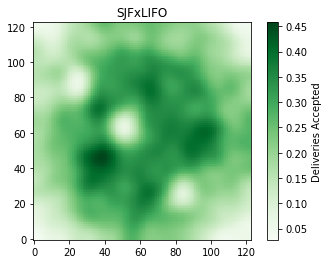

In [84]:
def gaussian_term_1d(x, sigma):
    coeff = 1/(math.sqrt(2 * math.pi) * sigma)
    exponent = math.exp(-(x * x)/(2 * sigma * sigma))
    return coeff * exponent
    
def gaussian_filter_1d(sigma):
    rad = int(math.ceil(3.5 * sigma))
    sz = 2 * rad + 1
    h = np.empty(sz)
    for x in range(0, sz):
        h[x] = gaussian_term_1d(x - rad, sigma)
    return h

sigma = 5

h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)

h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)

image_smoothed = scipy.signal.convolve2d(acceptedMap, h_x, mode='same', boundary="symm")
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same', boundary="symm")

fig, ax = plt.subplots()
im = ax.imshow(image_smoothed, cmap="Greens")
plt.gca().invert_yaxis()
cbar = ax.figure.colorbar(im, ax=ax, label="Deliveries Accepted")
plt.title(logName)
plt.show()